In [6]:
from numpy import loadtxt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.constraints import maxnorm


from sklearn.preprocessing import MinMaxScaler
import csv
import pandas as pd

from sklearn.metrics import mean_squared_error
import sklearn
print(sklearn.__version__)

from scipy.stats import spearmanr

0.21.3


0.18697137
-0.05571811
0.12845565
0.060555242
0.13311614
0.17193203
0.12625289
0.13938943
0.20463252
0.20404316
0.24724945
0.18879111
0.2058929
0.20061156
0.025200214
0.04750573
0.050826
0.05203802
0.06210149
0.062225886
0.054234434
0.06869461
0.059883483
0.08291127
[0.11159394952106537, 0.9340091653005879, 0.0, 1.0, 0.16650899995229107, 0.03274233637116818, 1.0, 0.012110726643598616, 0.0] => 0.186971 (expected 0.017706)
[0.12644655399067345, 0.0, 0.0, 1.0, 0.40716247623072044, 0.46602816901408445, 0.42857142857142855, 0.0017301038062283738, 0.8] => -0.055718 (expected 0.016258)
[0.1735650453382465, 0.8812164975410578, 0.0, 1.0, 0.30441784859906085, 0.5593769676884839, 1.0, 0.31833910034602075, 0.7] => 0.128456 (expected 0.006640)
[0.24466767082113164, 0.05279266775953004, 0.0, 1.0, 0.22220169980166707, 0.34297928748964374, 0.42857142857142855, 0.11678200692041522, 0.0] => 0.060555 (expected 0.070270)
[0.25905546160285914, 0.8812164975410578, 0.0, 1.0, 0.15712056051198517, 0.3874134217

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-0.06881824 -0.017087   -0.04254596]
Results: -0.04 (0.02) MSE


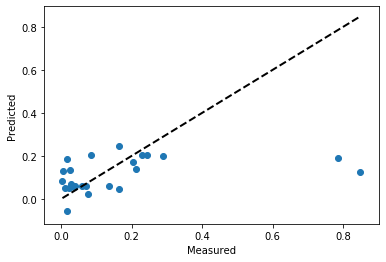

In [51]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-normalizados', usecols=  "E:O", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:10]
Y = dataset[0:71,10]
#print(Y)
#print(X)

X_test = dataset[71:95,1:10]
Y_test = dataset[71:95,10]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(14, input_dim=9, kernel_initializer='glorot_normal', activation='relu'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='glorot_normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     



1.5062059
0.86093843
2.1279564
1.4339463
1.8163041
2.7779984
2.1832442
3.0662565
3.1955295
3.4518132
6.4888306
3.8259034
3.5853672
3.5853672
5.5257106
2.112495
2.112495
2.112495
2.112495
1.4339463
1.5303713
1.4339463
1.1195794
0.5497924
[7.0, 8.0, 8.0, 5.0, 10.0, 1.0] => 1.506206 (expected 0.622247)
[7.0, 6.0, 8.0, 5.0, 10.0, 2.0] => 0.860938 (expected 0.609008)
[7.0, 8.0, 8.0, 5.0, 10.0, 3.0] => 2.127956 (expected 0.239806)
[7.0, 6.0, 8.0, 5.0, 9.0, 2.0] => 1.433946 (expected 2.329992)
[7.0, 8.0, 8.0, 5.0, 10.0, 2.0] => 1.816304 (expected 0.583529)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0] => 2.777998 (expected 4.239908)
[5.0, 8.0, 8.0, 5.0, 10.0, 1.0] => 2.183244 (expected 18.225274)
[5.0, 8.0, 8.0, 5.0, 9.0, 2.0] => 3.066257 (expected 4.457440)
[3.0, 8.0, 8.0, 5.0, 10.0, 2.0] => 3.195529 (expected 4.802120)
[3.0, 8.0, 9.0, 5.0, 10.0, 1.0] => 3.451813 (expected 1.708161)
[3.0, 8.0, 8.0, 5.0, 5.0, 2.0] => 6.488831 (expected 3.375710)
[3.0, 8.0, 8.0, 5.0, 9.0, 2.0] => 3.825903 (expected 15.146095

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-18.58294977  -3.72217433 -13.20553756]
Results: -11.84 (6.14) MSE


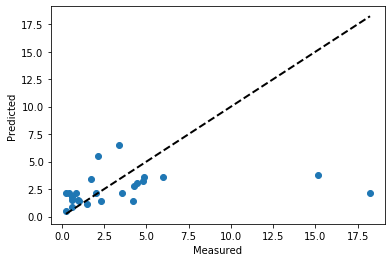

In [32]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-sin-parametros-adic', usecols=  "D:K", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:7]
Y = dataset[0:71,7]
#print(Y)
#print(X)
#dataset = loadtxt('NT2006-copia.csv', delimiter=',')
#X = dataset[:,3:12]
#Y = dataset[:,13]
#Y = dataset[:,17]

#dataset = loadtxt('NT2010-copia1.csv', delimiter=',') #sin sacar valores atípicos
X_test = dataset[71:95,1:7]
Y_test = dataset[71:95,7]
#Y_test = dataset[:, 16]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=6, kernel_initializer='glorot_normal', activation='softplus'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='glorot_normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=20, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     



1.1713398
0.3623055
2.4452667
2.1517942
1.8688418
13.420943
10.469181
9.261826
4.7452507
5.3488936
5.57058
4.4948735
6.2891607
9.27762
0.7687388
1.6625979
0.39808574
0.39808574
0.39808604
0.24374719
1.8028122
0.24374707
0.25280508
0.23907001
[3.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 1.0, 3.0] => 1.171340 (expected 0.427944)
[3.0, 7.0, 9.0, 10.0, 9.0, 10.0, 3.0, 1.0, 4.0] => 0.362305 (expected 0.340306)
[3.0, 10.0, 9.0, 10.0, 9.0, 7.0, 10.0, 4.0, 5.0] => 2.445267 (expected 0.198738)
[3.0, 7.0, 9.0, 10.0, 10.0, 10.0, 3.0, 10.0, 3.0] => 2.151794 (expected 1.633242)
[3.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 1.0, 6.0] => 1.868842 (expected 0.481466)
[7.0, 10.0, 9.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0] => 13.420943 (expected 4.833452)
[7.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 10.0, 8.0] => 10.469181 (expected 19.828288)
[7.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 6.0] => 9.261826 (expected 4.801875)
[8.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 8.0, 2.0] => 4.745251 (expected 4.663474)
[8.0, 10.0, 10.0,

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-13.61858535  -2.63826915  -8.12178994]
Results: -8.13 (4.48) MSE


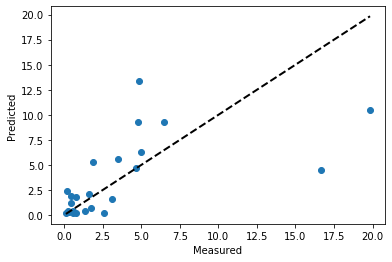

In [34]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-con-calif-calib', usecols=  "D:N", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:10]
Y = dataset[0:71,10]
#print(Y)
#print(X)

X_test = dataset[71:95,1:10]
Y_test = dataset[71:95,10]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(16, input_dim=9, kernel_initializer='uniform', activation='exponential'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=20, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     


1.8312883
0.9154589
3.7083461
3.1603673
3.0331051
15.685078
11.558761
9.433575
4.0387363
5.7186127
5.6717544
4.5517406
6.7062016
9.55028
0.97724706
2.29327
0.7198843
0.7198843
0.7198839
0.7488699
2.6145804
0.74887025
0.7485422
0.7209607
[3.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 1.0, 3.0] => 1.831288 (expected 0.342062)
[3.0, 7.0, 9.0, 10.0, 9.0, 10.0, 3.0, 1.0, 4.0] => 0.915459 (expected 0.248134)
[3.0, 10.0, 9.0, 10.0, 9.0, 7.0, 10.0, 4.0, 5.0] => 3.708346 (expected 0.181520)
[3.0, 7.0, 9.0, 10.0, 10.0, 10.0, 3.0, 10.0, 3.0] => 3.160367 (expected 1.597290)
[3.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 1.0, 6.0] => 3.033105 (expected 0.475034)
[7.0, 10.0, 9.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0] => 15.685078 (expected 4.864736)
[7.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 10.0, 8.0] => 11.558761 (expected 19.521962)
[7.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 6.0] => 9.433575 (expected 4.631842)
[8.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 8.0, 2.0] => 4.038736 (expected 4.012149)
[8.0, 10.0, 10.0, 10.0

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-7.68593649 -1.2550685  -8.65143249]
Results: -5.86 (3.28) MSE


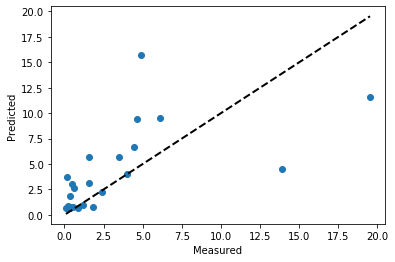

In [36]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-con-calif-calib (2)', usecols=  "D:N", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:10]
Y = dataset[0:71,10]
#print(Y)
#print(X)
#dataset = loadtxt('NT2006-copia.csv', delimiter=',')
#X = dataset[:,3:12]
#Y = dataset[:,13]
#Y = dataset[:,17]

#dataset = loadtxt('NT2010-copia1.csv', delimiter=',') #sin sacar valores atípicos
X_test = dataset[71:95,1:10]
Y_test = dataset[71:95,10]
#Y_test = dataset[:, 16]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='exponential'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     


1.1116327
1.2422599
2.337224
0.8526882
3.9216752
3.7501578
3.2110896
3.4192445
4.415898
3.4912736
3.1398394
3.0423887
3.2799563
3.4229937
0.9357998
2.2512875
0.7295075
0.7295075
0.7295075
0.73910224
2.7469683
0.73910224
0.71594226
0.68039453
[7.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 4.0, 0.0] => 1.111633 (expected 0.441807)
[7.0, 6.0, 8.0, 5.0, 10.0, 2.0, 4.0, 4.0, 3.0] => 1.242260 (expected 0.407556)
[7.0, 8.0, 8.0, 5.0, 10.0, 3.0, 8.0, 7.0, 4.0] => 2.337224 (expected 0.232302)
[7.0, 6.0, 8.0, 5.0, 9.0, 2.0, 4.0, 6.0, 0.0] => 0.852688 (expected 1.516520)
[7.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 4.0, 10.0] => 3.921675 (expected 0.596819)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 10.0] => 3.750158 (expected 4.304905)
[5.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 6.0, 8.0] => 3.211090 (expected 17.572865)
[5.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 6.0, 9.0] => 3.419245 (expected 4.485183)
[3.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 10.0, 10.0] => 4.415898 (expected 5.127859)
[3.0, 8.0, 9.0, 5.0, 10.0, 1.0, 8.0, 9.0, 8.0

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-15.87259634  -3.29313598 -11.12963355]
Results: -10.10 (5.19) MSE


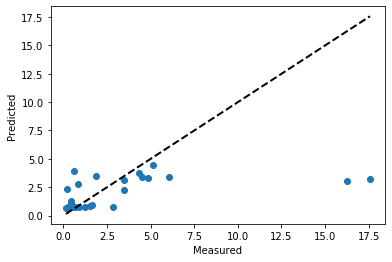

In [41]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-con-calif-sin-calib', usecols=  "D:N", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:10]
Y = dataset[0:71,10]
#print(Y)
#print(X)
#dataset = loadtxt('NT2006-copia.csv', delimiter=',')
#X = dataset[:,3:12]
#Y = dataset[:,13]
#Y = dataset[:,17]

#dataset = loadtxt('NT2010-copia1.csv', delimiter=',') #sin sacar valores atípicos
X_test = dataset[71:95,1:10]
Y_test = dataset[71:95,10]
#Y_test = dataset[:, 16]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=9, kernel_initializer='normal', activation='exponential'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     
